<a href="https://colab.research.google.com/github/Dhruv-Sharma01/CS399-Real-Time-Drone-Data-Analysis/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.0/887.0 kB 14.0 MB/s eta 0:00:00


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 18.0MB/s]



0: 384x640 12 persons, 311.6ms
Speed: 18.1ms preprocess, 311.6ms inference, 35.1ms postprocess per image at shape (1, 3, 384, 640)


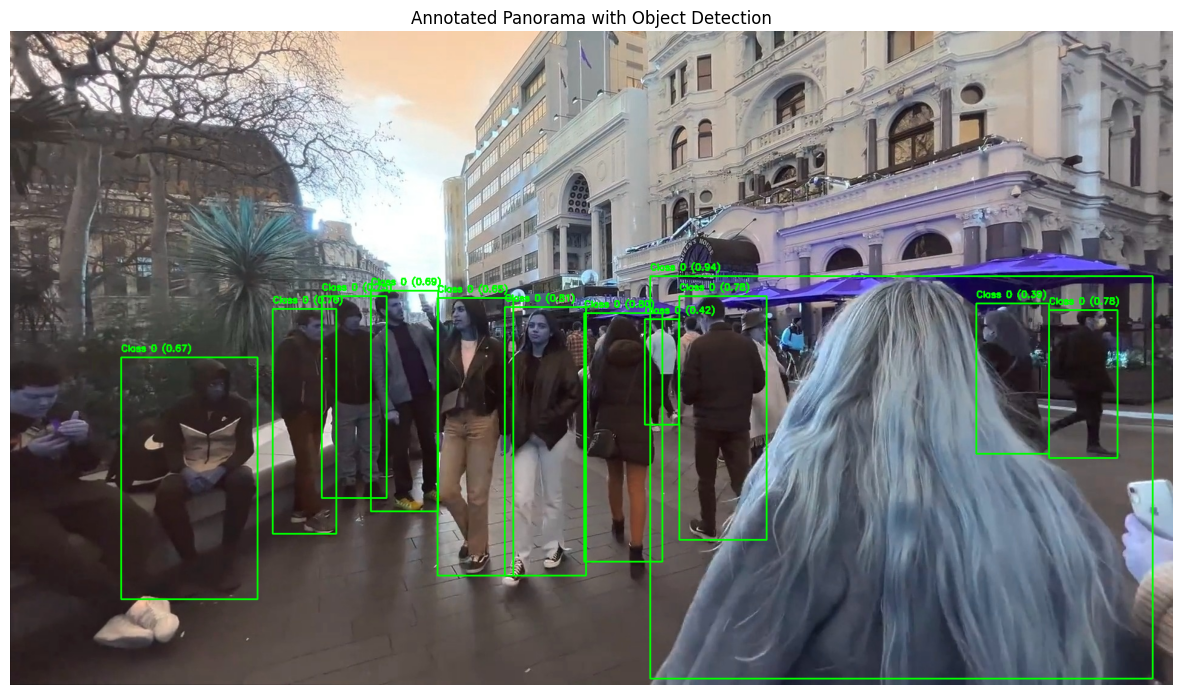

In [ ]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt


# Load the saved image for detection
pano_saved = cv2.imread("/content/stitched_panorama.jpg")

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')  # Load YOLOv8 Nano model

# Function to detect objects
def detect_objects(image):
    results = model(image)  # Perform detection
    detections = []
    for result in results:
        for box in result.boxes.data:
            x1, y1, x2, y2, confidence, class_id = box.tolist()
            detections.append((x1, y1, x2, y2, confidence, int(class_id)))
    return detections

# Function to draw bounding boxes
def draw_bounding_boxes(image, detections, class_names=None):
    for (x1, y1, x2, y2, confidence, class_id) in detections:
        label = f"Class {class_id} ({confidence:.2f})"
        color = (0, 255, 0)  # Green bounding box
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
        cv2.putText(image, label, (int(x1), int(y1 - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return image

# Perform detection on the saved image
detections = detect_objects(pano_saved)

# Annotate the image with bounding boxes
annotated_pano_saved = draw_bounding_boxes(pano_saved.copy(), detections)

# Save the annotated panorama as a new file
cv2.imwrite("annotated_panorama.jpg", annotated_pano_saved)  # Save annotated image to disk

# Display the annotated panorama
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(annotated_pano_saved, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis("off")
plt.title("Annotated Panorama with Object Detection")
plt.show()



0: 384x640 9 persons, 1 car, 1 bus, 2 traffic lights, 246.4ms
Speed: 6.1ms preprocess, 246.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


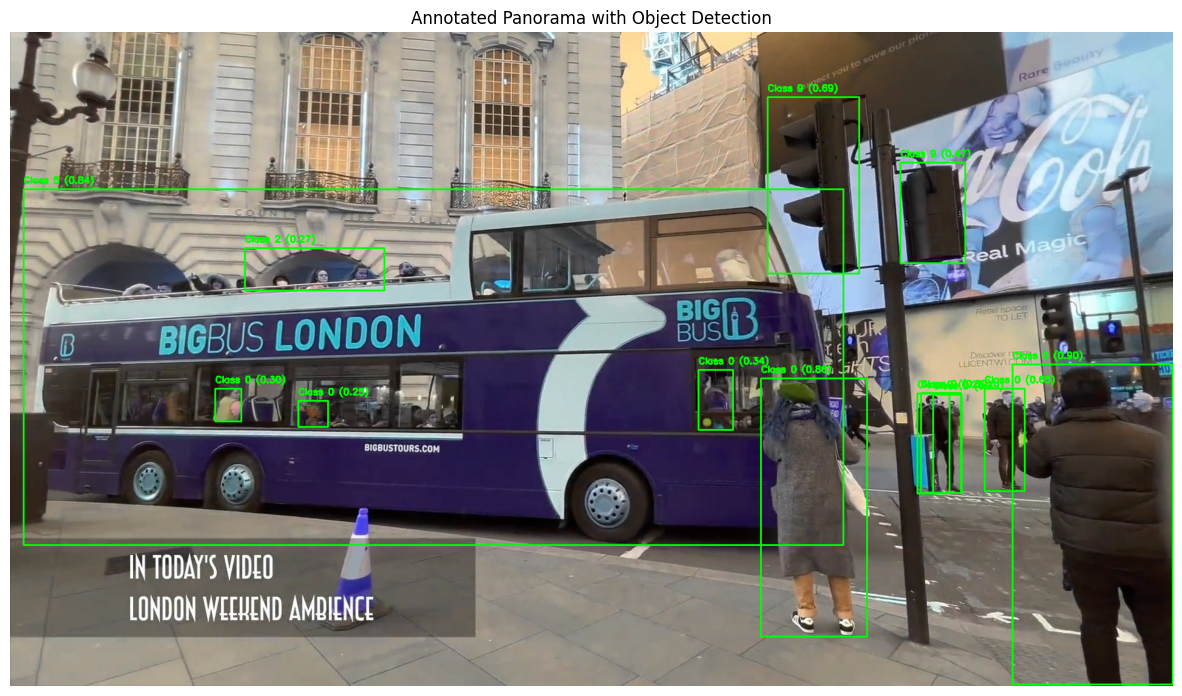

In [ ]:

# Load the saved image for detection
pano_saved = cv2.imread("/content/stitched_panorama1.jpg")

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')  # Load YOLOv8 Nano model

# Function to detect objects
def detect_objects(image):
    results = model(image)  # Perform detection
    detections = []
    for result in results:
        for box in result.boxes.data:
            x1, y1, x2, y2, confidence, class_id = box.tolist()
            detections.append((x1, y1, x2, y2, confidence, int(class_id)))
    return detections

# Function to draw bounding boxes
def draw_bounding_boxes(image, detections, class_names=None):
    for (x1, y1, x2, y2, confidence, class_id) in detections:
        label = f"Class {class_id} ({confidence:.2f})"
        color = (0, 255, 0)  # Green bounding box
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
        cv2.putText(image, label, (int(x1), int(y1 - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return image

# Perform detection on the saved image
detections = detect_objects(pano_saved)

# Annotate the image with bounding boxes
annotated_pano_saved = draw_bounding_boxes(pano_saved.copy(), detections)

# Save the annotated panorama as a new file
cv2.imwrite("annotated_panorama.jpg", annotated_pano_saved)  # Save annotated image to disk

# Display the annotated panorama
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(annotated_pano_saved, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis("off")
plt.title("Annotated Panorama with Object Detection")
plt.show()
